In [53]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import requests
import numpy as np
from pandas.io.json import json_normalize
import requests                  
from bs4 import BeautifulSoup    
import re                        
from datetime import datetime    
from time import mktime          

In [61]:
##variables
url = "https://apidojo-yahoo-finance-v1.p.rapidapi.com/market/get-summary"
token = "22990f9b4amsh4df04e987b36e1bp18331cjsn862ed02f8065"
day_begin = "01-01-2014"
day_end = "01-01-2019"
interval = "1d"
List_of_raws = list()

In [ ]:
#START THE PROCESS
def start():
    Stockslist = list()
    Stocknames = list()
    End_of_Party = 0
    while End_of_Party == 0:
        input_stock = (input("Insert the Name of the Company to add stock, otherwise enter \"done\": "))
        input_stock = input_stock.upper()
        if input_stock == "DONE":
            End_of_Party += 1
        else:
            Stocknames.append(input_stock)
            input_stock = (input("Insert the SHORT NAME (Stockname) to add stock, otherwise enter \"done\": "))
            input_stock = input_stock.upper()
            if input_stock == "DONE":
                End_of_Party += 1
            else:
                Stockslist.append(input_stock)
            continue
        get_data_rollin(Stocknames, Stockslist)

In [ ]:
#activate the load data function
def get_data_rollin(Stocks, Shortnames):
    index = 0 
    for Stock in Stocks:
        Stock+"_raw" = load_csv_data("Shortnames[index]", interval, day_begin, day_end)
        List_of_raws = List_of_raws.append(Stock+"_raw")
        index +=1

In [57]:
def _get_crumbs_and_cookies(stock):
    
    url = 'https://finance.yahoo.com/quote/{}/history'.format(stock)
    with requests.session():
        header = {'Connection': 'keep-alive',
                   'Expires': '-1',
                   'Upgrade-Insecure-Requests': '1',
                   'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; WOW64) \
                   AppleWebKit/537.36 (KHTML, like Gecko) Chrome/54.0.2840.99 Safari/537.36'
                   }
        
        website = requests.get(url, headers=header)
        soup = BeautifulSoup(website.text, 'lxml')
        crumb = re.findall('"CrumbStore":{"crumb":"(.+?)"}', str(soup))

        return (header, crumb[0], website.cookies)

In [58]:
def convert_to_unix(date):
    
    datum = datetime.strptime(date, '%d-%m-%Y')
    
    return int(mktime(datum.timetuple()))


In [59]:
def load_csv_data(stock, interval, day_begin, day_end):
  
    day_begin_unix = convert_to_unix(day_begin)
    day_end_unix = convert_to_unix(day_end)
    
    header, crumb, cookies = _get_crumbs_and_cookies(stock)
    
    with requests.session():
        url = 'https://query1.finance.yahoo.com/v7/finance/download/' \
              '{stock}?period1={day_begin}&period2={day_end}&interval={interval}&events=history&crumb={crumb}' \
              .format(stock=stock, day_begin=day_begin_unix, day_end=day_end_unix, interval=interval, crumb=crumb)
                
        website = requests.get(url, headers=header, cookies=cookies)
       
        return website.text.split('\n')[:-1]

In [44]:
def make_it_beautiful(:
    

Blau_raw


In [323]:
#Separate the lists by commas
List_col = ["Date","Open","High","Low","Close","Adj Close","Volume"]
Amazon = list()
for day in Amazon_raw:
    day = day.split(",")
    Amazon.append(day)
    
Tencent = list()
for day in Tencent_raw:
    day = day.split(",")
    Tencent.append(day)
    
Alibaba = list()
for day in Alibaba_raw:
    day = day.split(",")
    Alibaba.append(day)
    
#get Dataframes.
df_amazon = pd.DataFrame(Amazon)
df_alibaba = pd.DataFrame(Alibaba)
df_tencent = pd.DataFrame(Tencent)

#first row to columnnames.
df_tencent = df_tencent.rename(columns=df.iloc[0])
df_amazon = df_amazon.rename(columns=df.iloc[0])
df_alibaba = df_alibaba.rename(columns=df.iloc[0])

#delete 1st row becaause those are the column names now. 
df_tencent = df_tencent.drop(0,axis=0)
df_amazon = df_amazon.drop(0, axis=0)
df_alibaba = df_alibaba.drop(0, axis=0)
#function to change column dtypes 
def change_to_numeric(Columns, Dataframe):
    for col in Columns:
        Dataframe[col] = pd.to_numeric(Dataframe[col])
Col_dtype_to_float = ["Open","High","Low","Close","Adj Close","Volume"]
#execute change of dtypes from columns
change_to_numeric(Col_dtype_to_float, df_tencent)
change_to_numeric(Col_dtype_to_float, df_alibaba)
change_to_numeric(Col_dtype_to_float, df_amazon)



In [324]:
#change of column names except of Date:
x = {}
Col_dtype_to_float = ["Open","High","Low","Close","Adj Close","Volume"]
def changecolname(old_cols, Dataframe, NameofComp):
    for col in old_cols:
        x.update({col: NameofComp+col})
    Dataframe = Dataframe.rename(columns = x)
    return Dataframe
 
df_alibaba = changecolname(Col_dtype_to_float, df_alibaba, "Alibaba")
df_amazon = changecolname(Col_dtype_to_float, df_amazon, "Amazon")
df_tencent = changecolname(Col_dtype_to_float, df_tencent, "Tencent")

In [325]:
#merge all Dataframes: 
df_ali_ama = df_alibaba.merge(df_amazon, how="inner", on="Date")
df_all = df_ali_ama.merge(df_tencent, how="inner", on="Date")

In [341]:
#get percantages of all Close Data 

def percentage(Dataframe, Liste, Name):
    empty = list()
    for x in Dataframe[Name + "Close"]:
        if len(empty) < 0.1:
            y = x
        perc = x / y
        empty.append(perc)
    Liste = empty
    return Liste

ama = percentage(df_all, ama, "Amazon")
ali = percentage(df_all, ali, "Alibaba")
ten = percentage(df_all, ten, "Tencent")


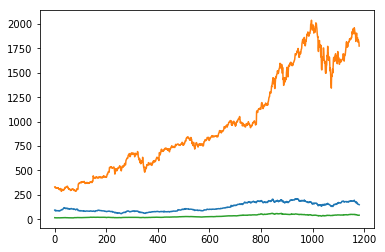

In [344]:
df_close_all = df_all[["AlibabaClose","AmazonClose","TencentClose"]]
plt.plot(df_close_all)